# Differences in Capitalization in Spam and Non-Spam Email

## Introduction

The `Spambase` dataset is a collection of assorted emails. Its variables include the frequencies of various words, lengths of capital letter sequences, and class: spam(1) or non-spam(0).

Spam email is unsolicited bulk email, often explicit or commercial, and has been an issue since the 1990s (Cranor et al., 1998, p.74). Spam is low-cost to send, but burdens service providers and recipients. While declining as of 2013, spam has become sophisticated, disguising itself from filters (Irani et al., 2013, p.2).

Due to spam's increasing complexity, additional work is needed to increase the efficacy of its detection. To assist the construction of more practical spam filters, we will look for consistent content differences between spam and non-spam. We focus on the average length of sequences of capital letters, assuming that spam likely uses capitalization to create false urgency and garner attention.

The question we set out to answer is:

**"Is the mean average length of uninterrupted sequences of capital letters different for spam and non-spam email?"**

## Methods and Results

We will first load the needed packages.

In [ ]:
library(tidyverse)
library(repr)
library(cowplot)
library(infer)
library(broom)

`read.csv()` reads the dataset from the web. The data is already tidy, but we rename the columns with col_names()and convert 0 and 1 to 'non-spam' and 'spam' in the class variable.

In [ ]:
spambase <- read.csv("https://raw.githubusercontent.com/rchanpra/stat-201-project/main/spambase/spambase.data")

In [ ]:
colnames(spambase) <- c("word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our",
                        "word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail",
                        "word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses",
                        "word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit",
                        "word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp",
                        "word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs",
                        "word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85",
                        "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct",
                        "word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project", "word_freq_re",
                        "word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(",
                        "char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average",
                        "capital_run_length_longest","capital_run_length_total","class")

In [ ]:
spambase <- spambase %>% 
    mutate(class = ifelse(class == 1, "spam", "non-spam"))

Here, we check the size of the dataset and take a peek at the first few rows.

In [ ]:
nrow(spambase)

In [ ]:
print("Table 1: Original Spambase Dataframe")
head(spambase)

We compute the sample mean and standard deviation of the average run length of capital letters, the count of spam and non-spam, and the difference in means.

In [21]:
# Considering that the dataset is a sample from the larger population of spam email,
# computing the mean and standard deviation of the word frequencies for each class produces our point estimates
# We select the columns we need (class and capital_run_length_average)

spambase_selected <- spambase %>% 
    select(capital_run_length_average,class)

spambase_stats <- spambase_selected %>% 
    group_by(class) %>% 
    summarize(mean_capital_run_length_average = mean(capital_run_length_average), 
              sd_capital_run_length_average = sd(capital_run_length_average), 
              n = n())

print("Table 2: Spambase Sample Statistics")
spambase_stats

[1] "Table 2: Spambase Sample Statistics"


class,mean_capital_run_length_average,sd_capital_run_length_average,n
<chr>,<dbl>,<dbl>,<int>
non-spam,2.377301,5.113685,2788
spam,9.522345,49.859762,1812


In [22]:
diff_in_means <- spambase_stats$mean_capital_run_length_average[2] - spambase_stats$mean_capital_run_length_average[1]

diff_in_means

[1] 7.145045

Spam has a greater sample mean and standard deviation than non-spam email.

We visualize the sample distribution using `geom_boxplot()` and `geom_histogram()`.

In [23]:
# Graph the distribution of variable of interest for each class, with vertical lines indicating the means of each class
spam_boxplot <- spambase_selected %>% 
    ggplot() + 
    geom_boxplot(aes(class, capital_run_length_average, fill = class), outlier.shape = NA) + 
    # we do not display some extreme values, which are impractical to plot
    scale_y_continuous(limits = c(0, 10)) + 
    theme(text = element_text(size = 10)) + 
    ggtitle("Figure 1: Boxplot of average length of capital letter runs for Spam and Non-Spam emails") + 
    xlab("Class") + 
    ylab("Average length of uninterrupted sequence of capital letters")

In [24]:
spam_histogram <- spambase_selected %>% 
    filter(class == "spam") %>% 
    ggplot() + 
    geom_histogram(aes(x = capital_run_length_average, y = after_stat(density)), binwidth = 0.2) + 
    # we do not display some extreme values, which are impractical to plot
    scale_x_continuous(limits = c(0, 50)) + 
    theme(text = element_text(size = 10)) + 
    ggtitle("Figure 2: Sample distribution of mean length of capital letter runs for Spam emails") + 
    ylab("Frequency") + 
    xlab("Average length of uninterrupted sequence of capital letters")

non_spam_histogram <- spambase_selected %>% 
    filter(class == "non-spam") %>% 
    ggplot() + 
    geom_histogram(aes(x = capital_run_length_average, y = after_stat(density)), binwidth = 0.2) + 
    # we do not display some extreme values, which are impractical to plot
    scale_x_continuous(limits = c(0, 50)) + 
    theme(text = element_text(size = 10)) + 
    ggtitle("Figure 3: Sample distribution of mean length of capital letter runs for Non-Spam emails") + 
    ylab("Frequency") + 
    xlab("Average length of uninterrupted sequence of capital letters")

Warning message:
“Removed 189 rows containing non-finite values (`stat_boxplot()`).”


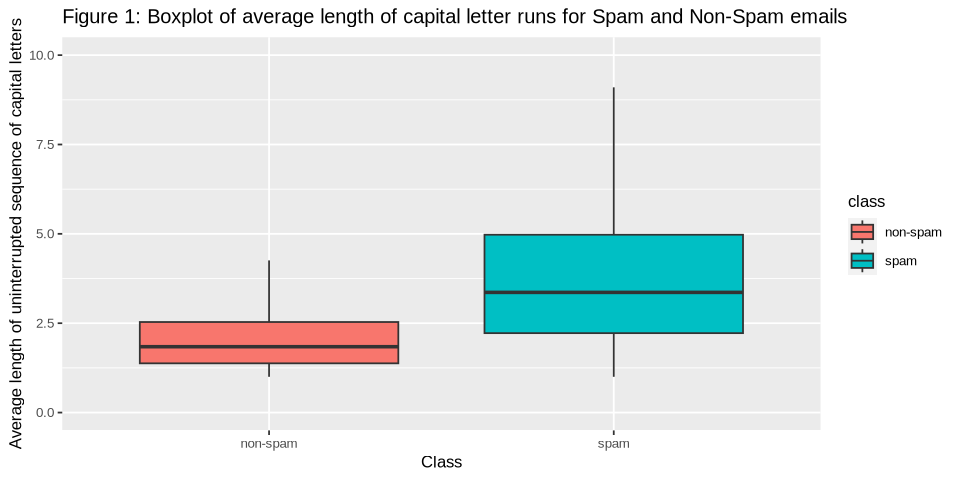

In [25]:
options(repr.plot.width = 8, repr.plot.height = 4)
spam_boxplot

Warning message:
“Removed 42 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


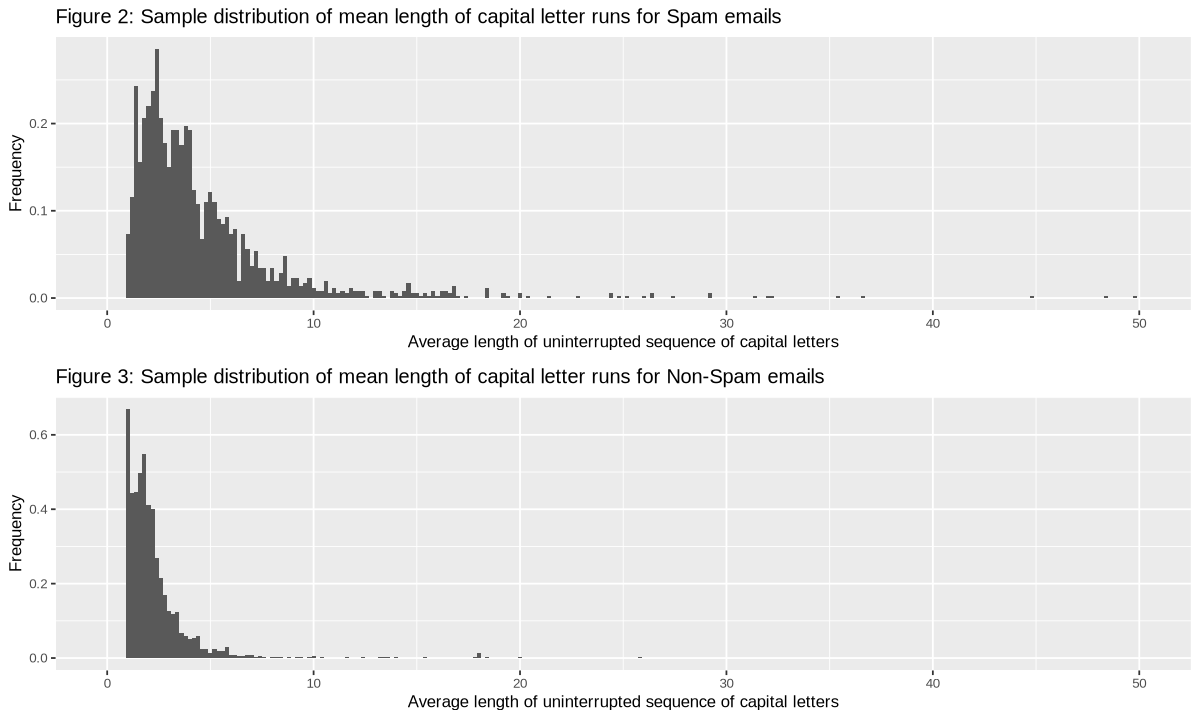

In [26]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot_grid(spam_histogram, non_spam_histogram, ncol = 1)

*Note: some larger values/outliers are not pictured in order to fit the majority of values.

Spam emails seem to typically have a greater average length with a wider spread.
The distributions for both are unimodal and strongly right-skewed.

Based on these results, we might believe spam has longer capital letter sequences. For instance, an email with unusually long sequences of capitals is suspect.

### Methods: Plan

Assuming `Spambase` is a representative sample, our estimates of the mean values for capital letter sequences of spam and non-spam emails are likely good approximations of the true values, especially given the samples' large size. However, our point estimates do not provide any measure of how close they are likely to be to the true values: we do not know their uncertainty. We cannot use these results without further work.

Since both samples are large (1812 spam, 2788 non-spam), we can use the theory-based approach, assuming the sampling distribution is approximately normal by the Central Limit Theorem; and bootstrapping, which makes no such assumptions.

For our analysis, we will build a confidence interval of the difference in means to obtain a range of values that we are confident contains the true difference.  

We also use both theory-based and bootstrapping-based approaches to conduct a hypothesis test. We will two hypothesis tests for the difference in means, one using bootstrapping, the other theory-based, with $H_0: \mu_1 = \mu_0$ vs $H_1: \mu_1\gt \mu_0$, where 1 and 0 represent spam and non-spam. If spam email has a larger mean average than non-spam, we would expect to gain evidence of it from these inferences. If our results are significant we will be able to safely reject the null hypothesis, and conclude that the mean capital letter sequence length of spam is greater than that of non-spam. 

We will use a significance level of $\alpha\$ = 0.05, a commonly used value.

### Bootstrap Confidence Interval
We begin with bootstrapping, which does not make assumptions about the the data.

We will start by constructing a 95% confidence interval for the difference in the mean capital letter usage between spam and non-spam emails using bootstrapping, which gives us a better idea about the difference in means of the two groups spam and non-spam. 

We are using the `infer` package workflow to estimate the distribution of the difference in means, specifying the formula in `specify()`, generating 1000 bootstrap samples with `generate()`, and using `calculate()` to find the difference in means. Passsing the distribution `get_confidence_interval` then returns a tibble with a lower and upper bound for the difference.

In [29]:
set.seed(1048596)
spam_bootstrap_dist <- spambase_selected |> 
    specify(formula = capital_run_length_average ~ class) |>
    generate(reps = 1000, type = "bootstrap") |>
    calculate(stat = "diff in means",order = c("spam", "non-spam"))
    
spam_ci <- spam_bootstrap_dist |> 
    get_confidence_interval(level = 0.95,type = "percentile")
spam_ci # here's a 95% confidence interval for the mean occurrences of spam in email.

lower_ci,upper_ci
<dbl>,<dbl>
5.059496,9.755062


We find that the lower bound for the difference in the means is 5.06 and the upper bound is 9.76. The confidence interval does not contain 0 and both bounds are positive, which suggests that the true mean value of spam is greater than the mean of non-spam. 

We are 95% confident, meaning that we would expect 95% of total confidence intervals to capture the true difference in means. For instance, if we constructed 100 such intervals using different samples, we would expect 95 of them to contain the true difference in means.

### Bootstrap Hypothesis Test

Our null hypothesis is that the mean average capital letter frequency is the same for spam versus non-spam email. The alternate hypothesis is that the mean average capital letter frequency is different for spam versus non-spam email. 

$H_0: \mu_1 = \mu_0$ vs $H_1: \mu_1\gt \mu_0$

(1 and 0 represent spam and non-spam respectively)

We do a one-sided hypothesis test, because we believe that spam email will contain more capital letters on average than non-spam. We chose an alpha of 0.05.

The null distribution is what our sampling distribution would look like if there was no difference between the means of average capital letter usage between the populations of spam and non-spam emails. By comparing our sample to this model, we can determine how unusual our sample would be if the null hypothesis were true.

Here, we create the null model for this null hypothesis, using the `infer` package workflow again.

In [37]:
set.seed(1337) # set the seed

obs_diff_in_means <- spambase_selected |> 
    specify(formula = capital_run_length_average ~ class) |>
    calculate(stat= "diff in means", order = c("spam","non-spam"))

null_diff_in_means <- spambase_selected |> 
    specify(formula = capital_run_length_average ~ class) |>
    hypothesize(null = "independence") |>
    generate(reps = 1000, type="permute") |>
    calculate(stat = "diff in means",order = c("spam","non-spam"))

Now, we use the function `get_p_value()` to calculate the p-value, the probability of observing a value so extreme towards the alternate hypothesis.

In [42]:
p_value <- null_diff_in_means |> get_p_value(obs_stat = obs_diff_in_means,direction="right")
print("Table X")
p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


[1] "Table X"


p_value
<dbl>
0


Attribution: The following code was adapted from tutorial \#6, and was further double-checked with a code generation model (no code written by the model was added to the report)

We obtain the dubious p-value of 0. The function `get_p_value()` may return 0 when the observed statistic is extremely unlikely given the null hypothesis, but a small number of reps have been generated for the null distribution. Our observed statistic is more extreme than every test statistic generated to form the null distribution, resulting in an approximate p-value of 0 (RDocumentation)

In the case that a p-value of zero is reported, a warning message will be raised to caution the user against reporting a p-value exactly equal to 0.



We visualize the statistic on the null distribution and see that the p-value would be extremely close to 0. Likely the 

In [39]:
diff_in_means_plot <- # adapted from tutorial 6 solution
    visualize(null_diff_in_means, bins = 10) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "right") +
    xlab("Figure 4: Difference in mean (red bar is the observed difference in means)") +
    theme(text = element_text(size = 20))

Warning message in min(diff(unique_loc)):
“no non-missing arguments to min; returning Inf”


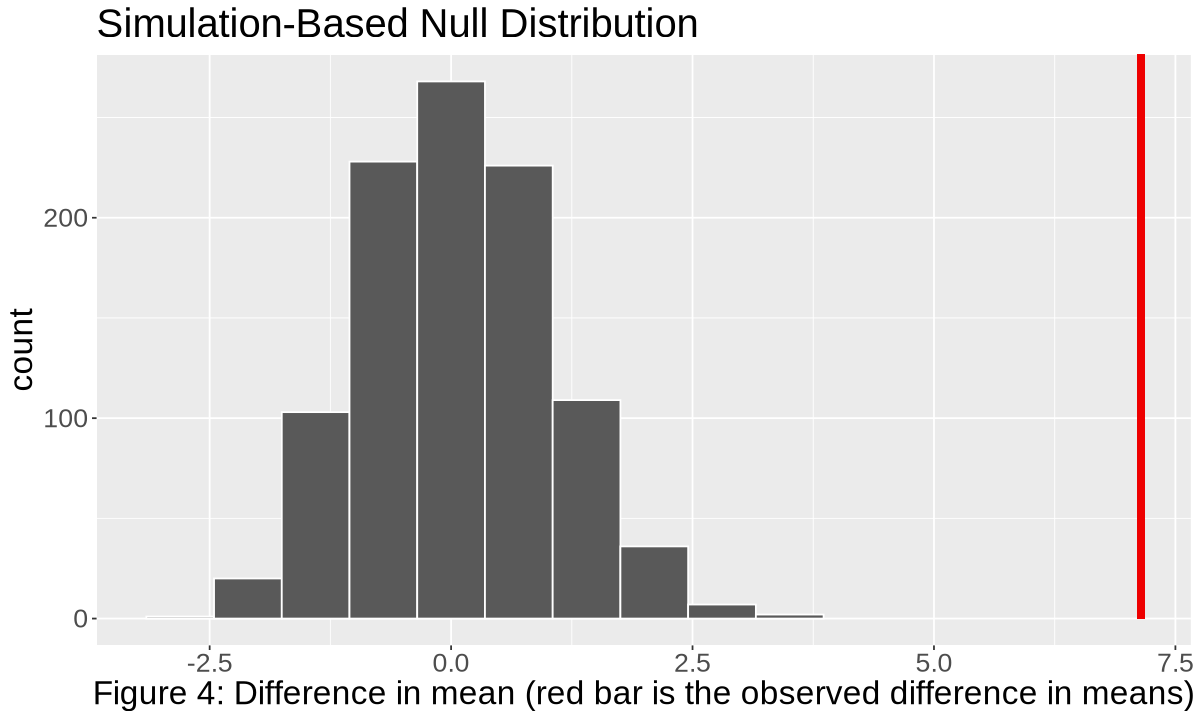

In [40]:
diff_in_means_plot

### Theory-based Hypothesis Test
Here we perform a t test to double-check the p value we acquired through bootstrapping. We confirm that the p value is infinitesimal. We note that though we originally favored the bootstrapping method of conducting a hypothesis test, our results were so significant that we could not actually attain a nonzero p value using that method and the computational resources at our disposal. Hence, the asymptotic approach has an advantage in that it lets us approximate just how small our small p value is.

Each method of approximation gave similar results, in that they were quite small, yet technically one is still infinitely larger than the other. However both are quite sufficient to reject the null hypothesis, so we deem neither particularly more trustworthy than the other: yes, a 0 p value is mathematically impossible, but it's unclear how far off the computed p value is from the real p value, at such a small size, so we do not necessarily trust the asymptotic value completely either.

In [18]:
set.seed(1048596)

# Two-sample T test.
print("Table 3: p Value Computed Using Asymptotics and a Two-Sample T-test.")
tidy(
    prop.test(
        x=c(nrow(filter(spambase_selected,class=="non-spam"))),
        n=c(nrow(spambase_selected)),
        p=0.5, # null hypothesis: there's no difference in the distribution
        alternative="greater",
        conf.level=0.95, # 0.05 conf interval TODO check
        correct=FALSE # don't use fancy statistical methods to fix stuff up
    )
)

[1] "Table 3: p Value Computed Using Asymptotics and a Two-Sample T-test."


estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.606087,207.0817,2.975352e-47,1,0.594178,1,1-sample proportions test without continuity correction,greater


We have determined through multiple statistcal means that there does indeed exist a relationship between longer capital letter sequences, and an email's classification as spam. Our results acheive a p value of either 0, or $2.975^{-47}$, depending on the method; both of which are (quite) statistically significant against our alpha of 0.05. This leads us to reject the null hypothesis $H_0: \mu_1 = \mu_0$. This is the result we expected to find, given our preliminary analysis showed strong differences between the samples of spam and non-spam emails.

These results imply that the length of capital letter sequences is a fantastic indicator of whether or not an email is spam; we believe this can inform both individuals and AI model creators who are interested in keeping their inboxes relevant to them. We believe followup research could take advantage of results as strong as these to train a logistic regression model on capital letter sequence lengths alone, for extremely-computationally-lightweight spam detection capabilities. Future work could also progress towards identifying other categories in this dataset that are strongly correlated with an email being spam.